In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report 

In [ ]:
df=pd.read_excel("cancer_classification.xlsx")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df["target"]=df["target"].astype(int)

In [ ]:
x=df.iloc[:,:-1]
x
y=df["target"]

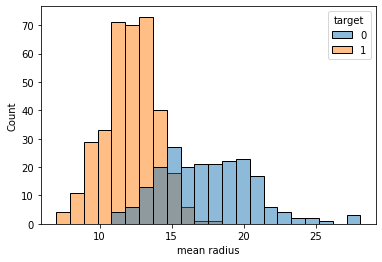

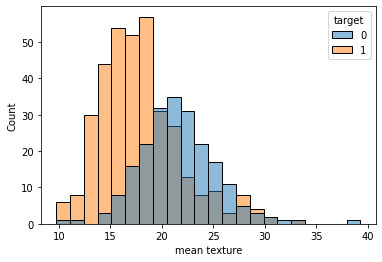

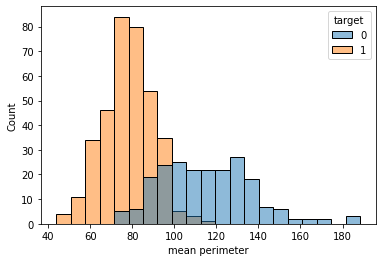

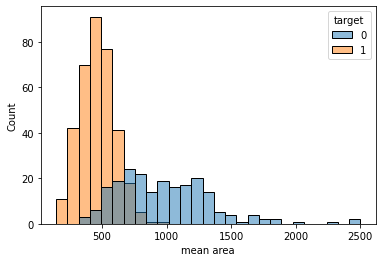

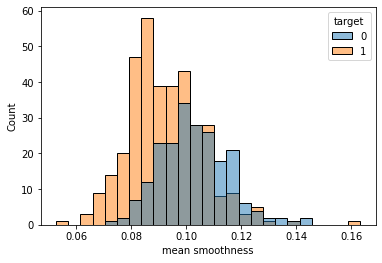

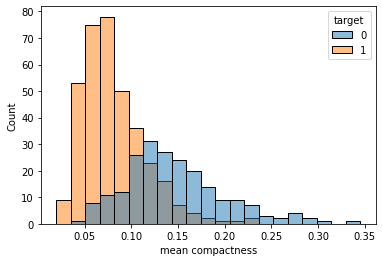

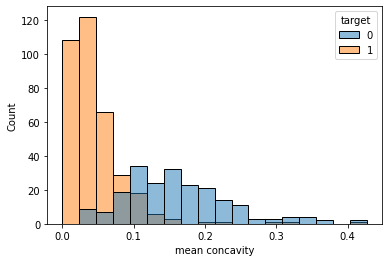

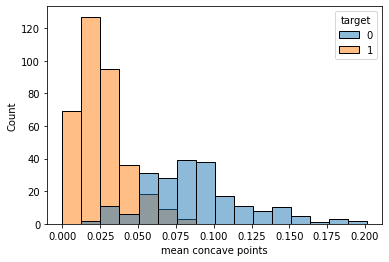

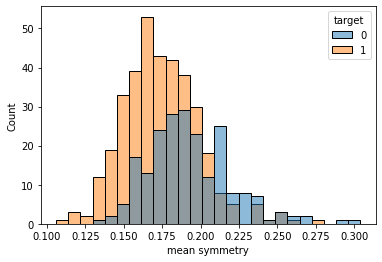

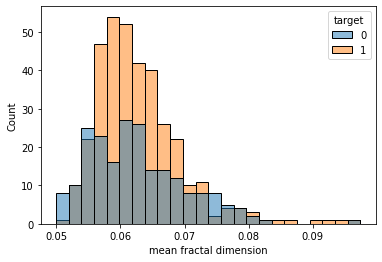

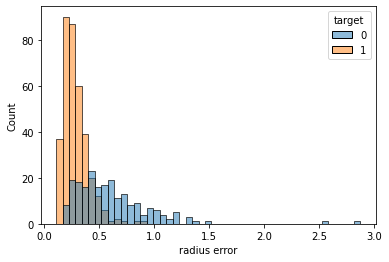

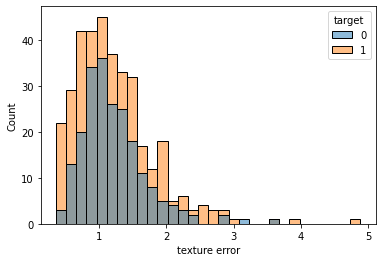

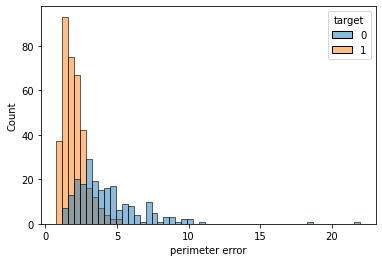

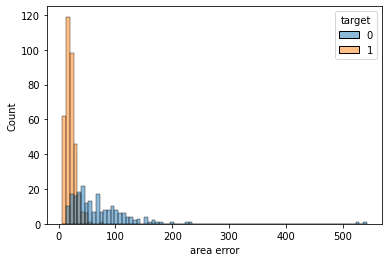

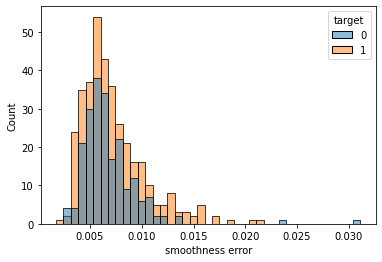

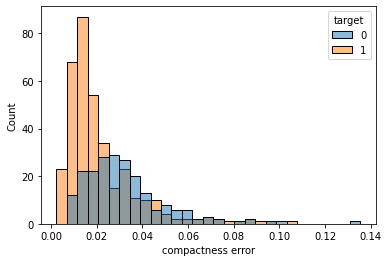

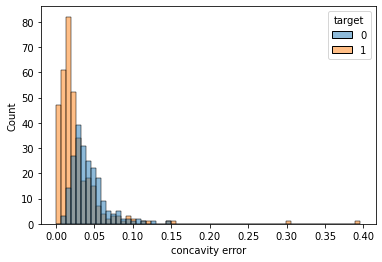

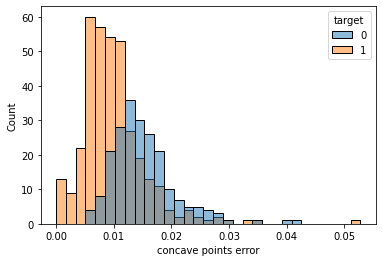

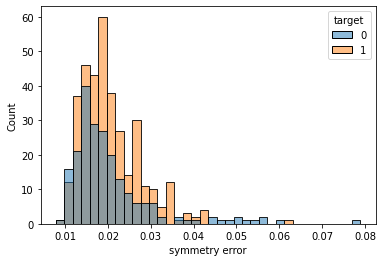

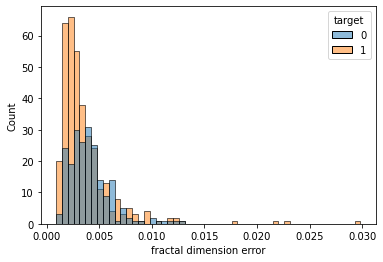

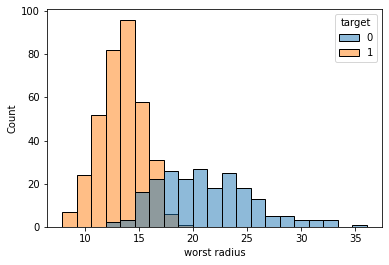

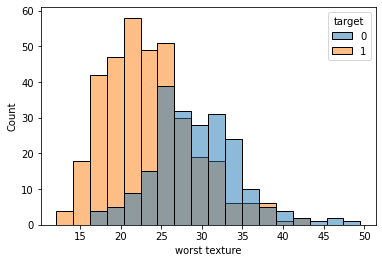

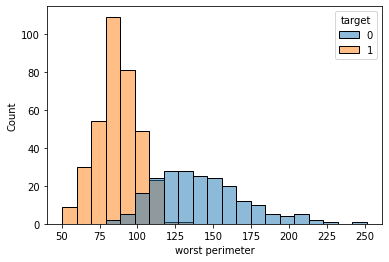

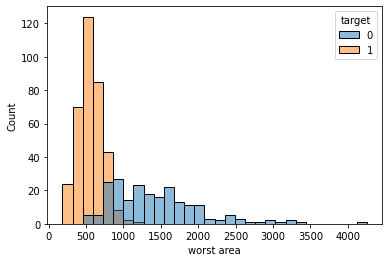

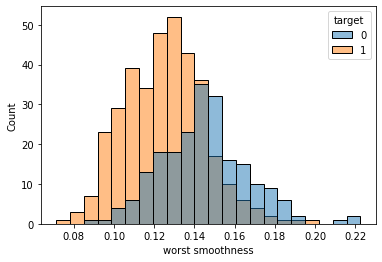

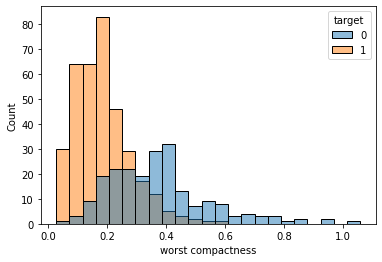

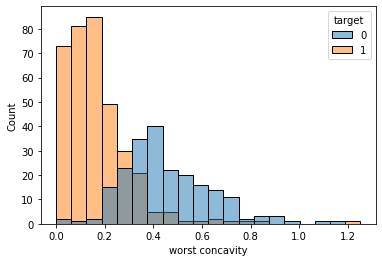

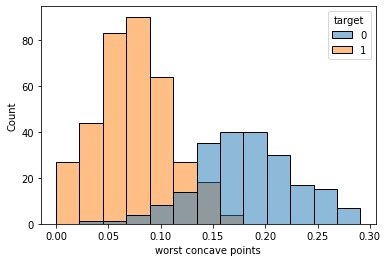

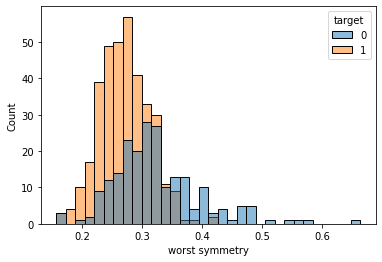

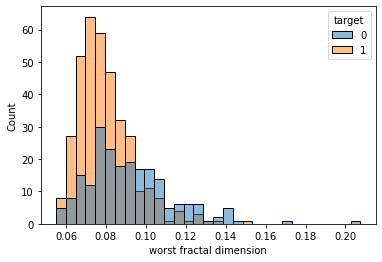

In [ ]:
for i in x.columns:
  sns.histplot(data=df,x=df[i],hue=df["target"])
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

In [ ]:
model=Sequential()
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain,ytrain,epochs=1500,validation_data=(xtest,ytest),verbose=1,batch_size=128,callbacks=[early_stop])

Epoch 1/1500
4/4 [==============================] - 2s 118ms/step - loss: 0.7385 - accuracy: 0.4171 - val_loss: 0.7385 - val_accuracy: 0.4269
Epoch 2/1500
4/4 [==============================] - 0s 30ms/step - loss: 0.7220 - accuracy: 0.4598 - val_loss: 0.7258 - val_accuracy: 0.4503
Epoch 3/1500
4/4 [==============================] - 0s 32ms/step - loss: 0.7073 - accuracy: 0.5126 - val_loss: 0.7129 - val_accuracy: 0.4795
Epoch 4/1500
4/4 [==============================] - 0s 26ms/step - loss: 0.6922 - accuracy: 0.5578 - val_loss: 0.7013 - val_accuracy: 0.5088
Epoch 5/1500
4/4 [==============================] - 0s 31ms/step - loss: 0.6784 - accuracy: 0.5854 - val_loss: 0.6900 - val_accuracy: 0.5556
Epoch 6/1500
4/4 [==============================] - 0s 25ms/step - loss: 0.6650 - accuracy: 0.6231 - val_loss: 0.6793 - val_accuracy: 0.5731
Epoch 7/1500
4/4 [==============================] - 0s 26ms/step - loss: 0.6522 - accuracy: 0.6658 - val_loss: 0.6689 - val_accuracy: 0.5906
Epoch 8/1500

In [ ]:
data=pd.DataFrame(model.history.history)


In [ ]:
data


,loss,accuracy,val_loss,val_accuracy
0,0.738510,0.417085,0.738549,0.426901
1,0.721985,0.459799,0.725847,0.450292
2,0.707334,0.512563,0.712857,0.479532
3,0.692177,0.557789,0.701317,0.508772
4,0.678432,0.585427,0.689984,0.555556
...,...,...,...,...
486,0.044818,0.989950,0.106097,0.953216
487,0.044780,0.989950,0.106091,0.953216
488,0.044738,0.989950,0.106060,0.953216
489,0.044692,0.989950,0.106272,0.953216


In [ ]:
loss=pd.DataFrame(data)

In [ ]:
ypred=model.predict(xtest)
ypred=ypred>0.5

6/6 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



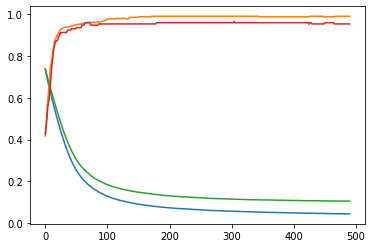

In [ ]:
plt.plot(data)
plt.show()